In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [73]:
data_hom = pd.read_csv('Datasets\homicidos.csv')

In [74]:
data_hom

,Id,Victimas,FECHA,Año,Mes,Dia,HORA,Franja_Horaria,Tipo_calle,Cruce,Direccion_Normalizada,COMUNA,X,Y,Victima,Acusado,Rol,Sexo,Edad
0,0,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,0,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,18
2,0,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO,PEATON,MASCULINO,83
3,0,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,25
4,0,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO,PEATON,FEMENINO,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,95,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,NaN,"PERON, EVA AV. 4071",9,-58.47066794,-34.65021673,AUTO,CARGAS,CONDUCTOR,MASCULINO,60
3376,96,1,2021-11-18,2021,11,18,06:10:00,6,CALLE,NaN,PADRE CARLOS MUGICA 709,1,-58.37976155,-34.58679619,BICICLETA,AUTO,PEATON,MASCULINO,80
3377,96,1,2021-11-18,2021,11,18,06:10:00,6,CALLE,NaN,PADRE CARLOS MUGICA 709,1,-58.37976155,-34.58679619,BICICLETA,AUTO,CONDUCTOR,FEMENINO,35
3378,96,1,2021-11-18,2021,11,18,06:10:00,6,CALLE,NaN,PADRE CARLOS MUGICA 709,1,-58.37976155,-34.58679619,BICICLETA,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,23


Observamos la cantidad de tipo Nan en las columnas del dataframe

In [75]:
data_hom.isna().sum()

Id                         0
Victimas                   0
FECHA                      0
Año                        0
Mes                        0
Dia                        0
HORA                       0
Franja_Horaria             0
Tipo_calle                 0
Cruce                    829
Direccion_Normalizada     40
COMUNA                     0
X                          0
Y                          0
Victima                    0
Acusado                    0
Rol                        0
Sexo                       0
Edad                       0
dtype: int64

Transformamos los datos de las columnas

In [76]:
#Columna franja horaria se reemplaza el valor 'SD' por 0 para transformar en enteros
data_hom['Franja_Horaria'].replace('SD', '0', inplace=True)
data_hom['Franja_Horaria'] = data_hom['Franja_Horaria'].astype(int)

#columna pos_x se reemplazan las comas por puntos y se convierte a tipo float.
data_hom['X'] = data_hom['X'].str.replace(',', '.', regex=True)
data_hom['X'] = pd.to_numeric(data_hom['X'], errors='coerce')
data_hom['X'].fillna(0.0, inplace=True)

#columna pos_y lo mismo que la anterior
data_hom['Y'] = data_hom['Y'].str.replace(',', '.', regex=True)
data_hom['Y'] = pd.to_numeric(data_hom['Y'], errors='coerce')
data_hom['Y'].fillna(0.0, inplace=True)

data_hom = data_hom.drop(columns='Id')
data_hom = data_hom[data_hom['Edad'] != 'SD']
data_hom['Edad'] = data_hom['Edad'].astype(int)
#inputamos faltantes en sexo por el siguiente que figura en el dataframe y con rol y vehiculo hacemos lo mismo
data_hom['Sexo'].replace('SD', pd.NA, inplace=True)
data_hom['Sexo'].ffill(inplace=True)
data_hom['Sexo'] = data_hom['Sexo'].astype('category')


data_hom['Rol'].replace('SD', pd.NA, inplace=True)
data_hom['Rol'].ffill(inplace=True)
data_hom['Rol'] = data_hom['Rol'].astype('category')

data_hom['Victima'].replace('SD', pd.NA, inplace=True)
data_hom['Victima'].ffill(inplace=True)
data_hom['Victima'] = data_hom['Victima'].astype('category')

#Imputamos los valores de las columnas Cruce y Direccion_Normalizada
data_hom['Cruce'].fillna('No', inplace=True)
data_hom['Direccion_Normalizada'].fillna(data_hom['Cruce'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18208\472173653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hom['Franja_Horaria'].replace('SD', '0', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18208\472173653.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Creamos una columna de rango etario

In [77]:
etiquetas_edad = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']

# Creamos los límites de los rangos etarios
limites_edad = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]

# Utilizamos la función cut de pandas para convertir la columna edad en un rango etario
data_hom['Edad'] = pd.cut(data_hom['Edad'], bins=limites_edad, labels=etiquetas_edad, right=False)

Cambiamos el tipo de dato de la columna para poder realizar ciertos gráficos en nuestro EDA

In [78]:
data_hom['Tipo_calle'] = data_hom['Tipo_calle'].astype('category')
data_hom['Victima'] = data_hom['Victima'].astype('category')
data_hom['Acusado'] = data_hom['Acusado'].astype('category')
data_hom['COMUNA'] = data_hom['COMUNA'].astype('category')
data_hom['FECHA'] = pd.to_datetime(data_hom['FECHA'])

In [79]:
data_hom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3136 entries, 0 to 3379
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Victimas               3136 non-null   int64         
 1   FECHA                  3136 non-null   datetime64[ns]
 2   Año                    3136 non-null   int64         
 3   Mes                    3136 non-null   int64         
 4   Dia                    3136 non-null   int64         
 5   HORA                   3136 non-null   object        
 6   Franja_Horaria         3136 non-null   int32         
 7   Tipo_calle             3136 non-null   category      
 8   Cruce                  3136 non-null   object        
 9   Direccion_Normalizada  3136 non-null   object        
 10  COMUNA                 3136 non-null   category      
 11  X                      3136 non-null   float64       
 12  Y                      3136 non-null   float64       
 13  Victima 

Tipo de datos en las columnas del dataframe

In [80]:
data_hom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3136 entries, 0 to 3379
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Victimas               3136 non-null   int64         
 1   FECHA                  3136 non-null   datetime64[ns]
 2   Año                    3136 non-null   int64         
 3   Mes                    3136 non-null   int64         
 4   Dia                    3136 non-null   int64         
 5   HORA                   3136 non-null   object        
 6   Franja_Horaria         3136 non-null   int32         
 7   Tipo_calle             3136 non-null   category      
 8   Cruce                  3136 non-null   object        
 9   Direccion_Normalizada  3136 non-null   object        
 10  COMUNA                 3136 non-null   category      
 11  X                      3136 non-null   float64       
 12  Y                      3136 non-null   float64       
 13  Victima 

Vemos nuevamente los valores faltantes

In [81]:
data_hom.isna().sum()

Victimas                 0
FECHA                    0
Año                      0
Mes                      0
Dia                      0
HORA                     0
Franja_Horaria           0
Tipo_calle               0
Cruce                    0
Direccion_Normalizada    0
COMUNA                   0
X                        0
Y                        0
Victima                  0
Acusado                  0
Rol                      0
Sexo                     0
Edad                     0
dtype: int64

In [82]:
# Guarda el DataFrame en el archivo CSV
data_hom.to_csv('Datasets\data_homicidios.csv',index=False)

Descripción de valores estadísticos del dataframe

In [83]:
data_hom.describe()

,Victimas,FECHA,Año,Mes,Dia,Franja_Horaria,X,Y
count,3136.000000,3136,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,1.038265,2018-10-31 02:01:41.020408064,2018.371492,6.040497,15.760842,11.639349,-57.564198,-34.100994
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-05-11 00:00:00,2017.000000,3.000000,9.000000,6.000000,-58.474604,-34.643583
50%,1.000000,2018-08-20 00:00:00,2018.000000,6.000000,16.000000,11.000000,-58.441114,-34.622603
75%,1.000000,2020-04-24 00:00:00,2020.000000,9.000000,23.000000,17.000000,-58.397172,-34.595636
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,0.000000,0.000000
std,0.204735,NaN,1.683602,3.406620,8.595697,6.687108,7.101835,4.207181


Distribución de variables

<function matplotlib.pyplot.show(close=None, block=None)>

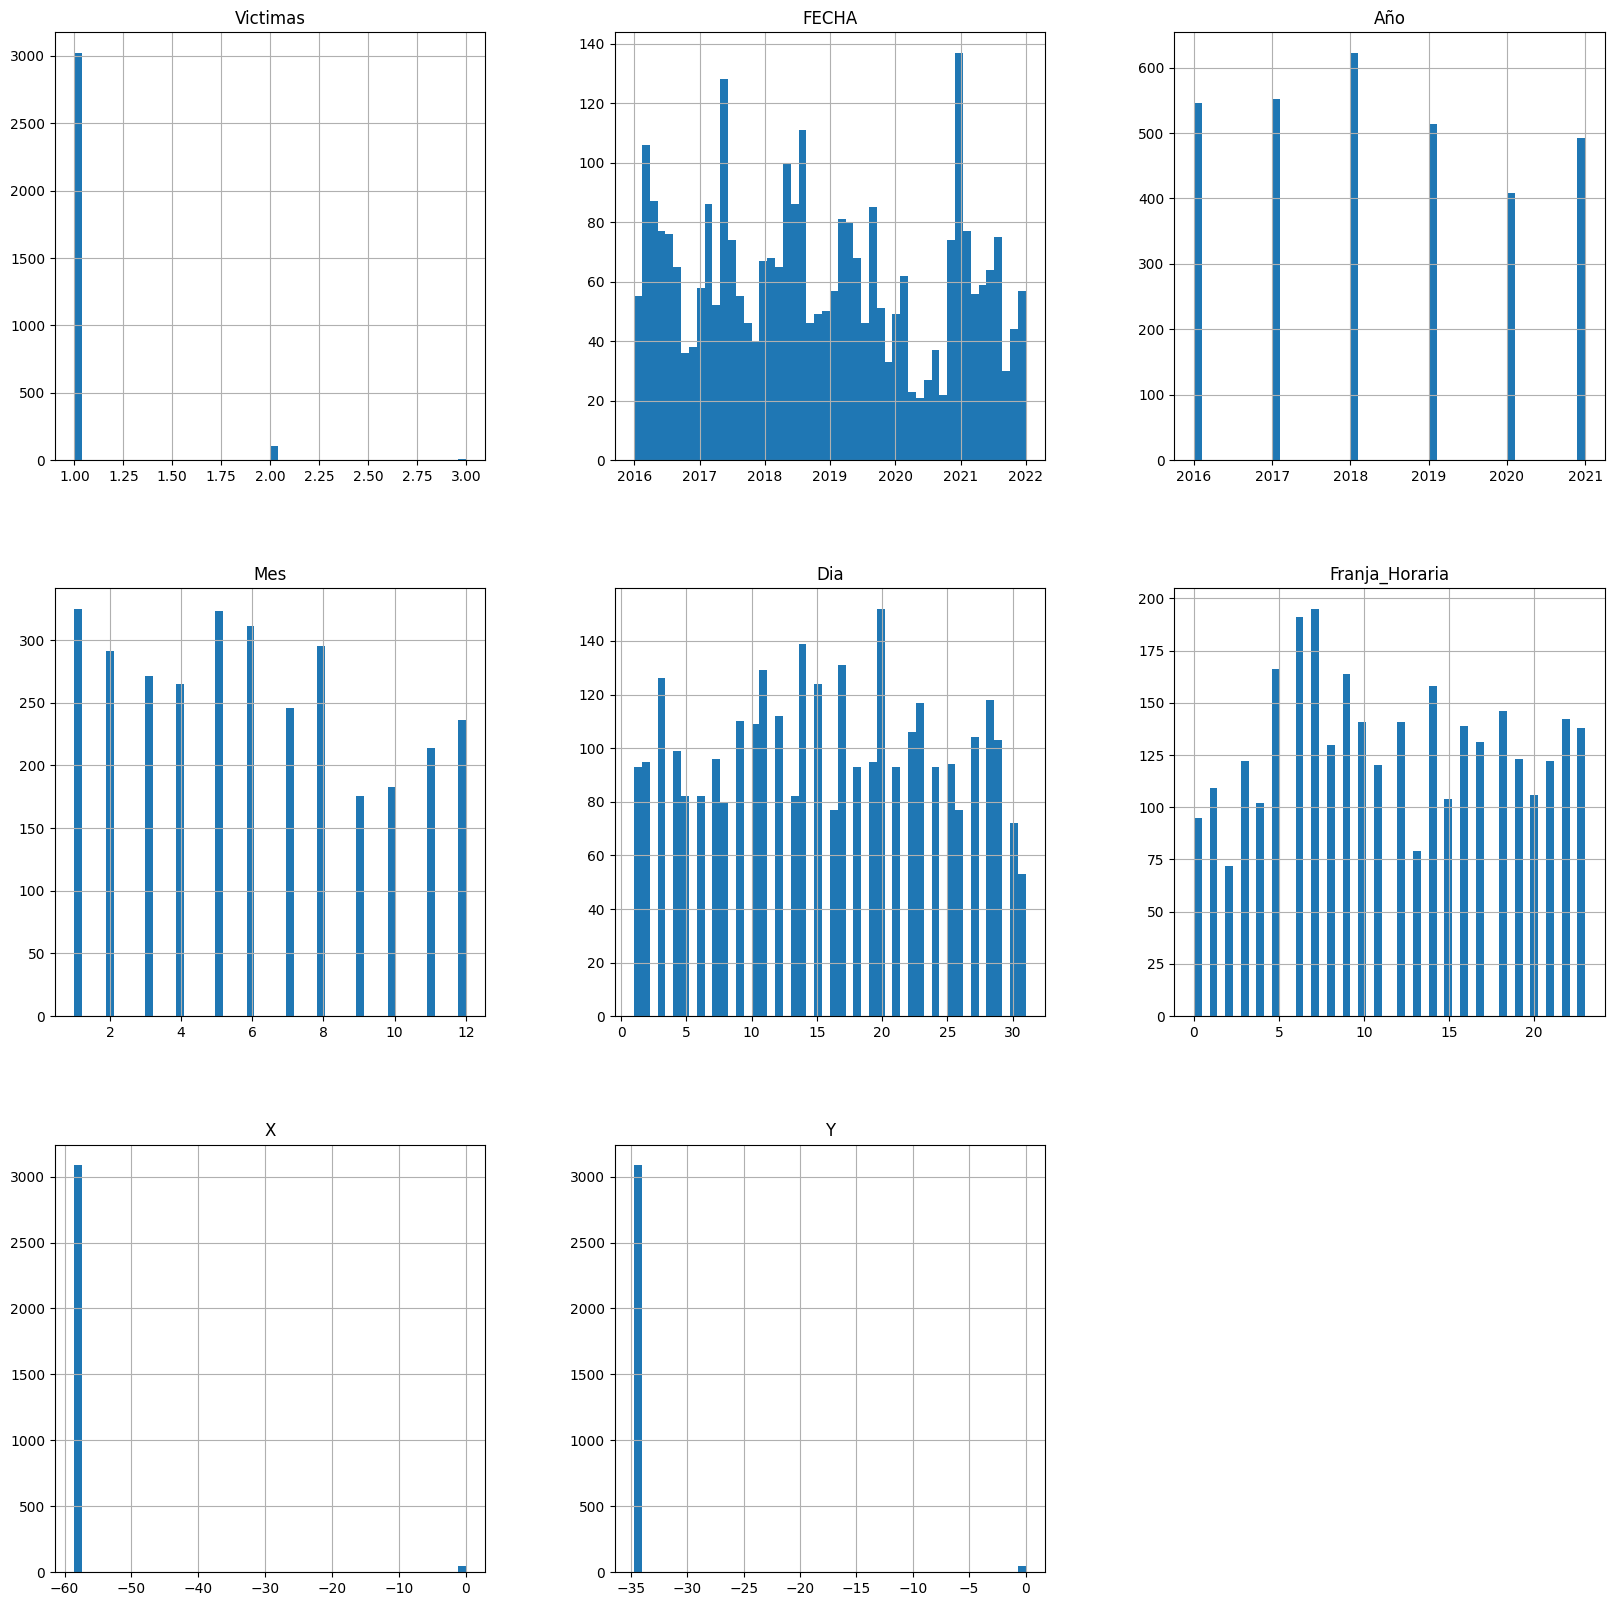

In [84]:
data_hom.hist(bins=50,figsize=(20,20))
plt.show

Distribución de la frecuencia de accidentes de tránsito efectuados en que tipo de calle y porqué tipo de vehiculo por parte del acusado

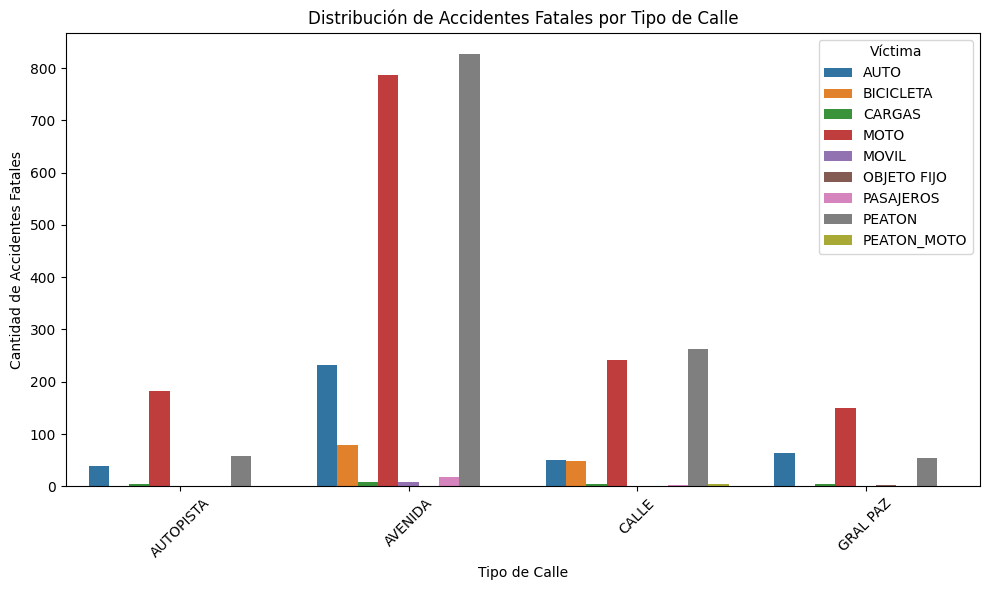

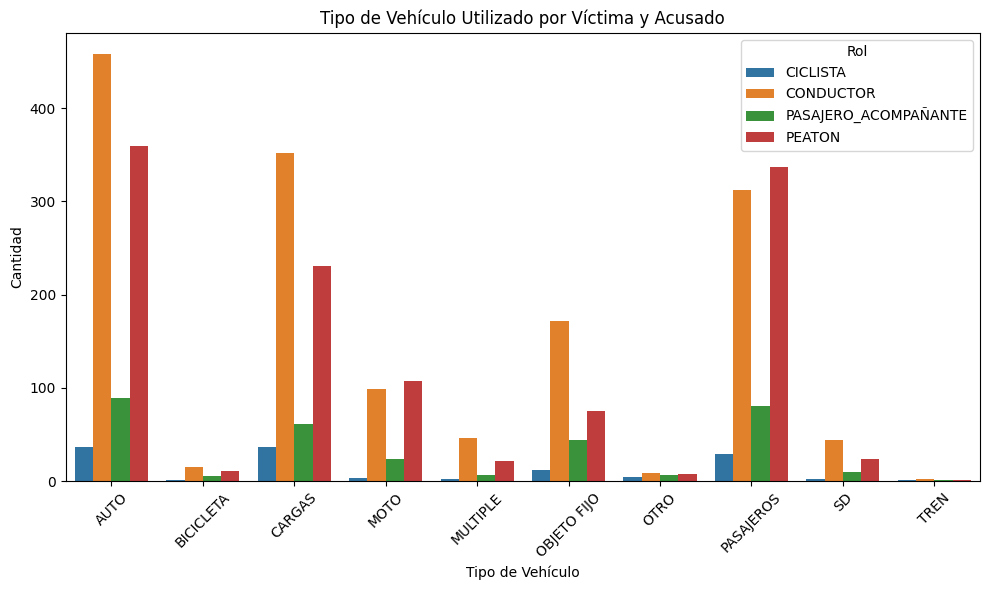

In [85]:
# Crear un gráfico de barras para mostrar la distribución de accidentes fatales por tipo de calle
plt.figure(figsize=(10, 6))
sns.countplot(data=data_hom, x='Tipo_calle', hue='Victima')
plt.title('Distribución de Accidentes Fatales por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Accidentes Fatales')
plt.xticks(rotation=45)
plt.legend(title='Víctima')
plt.tight_layout()
plt.show()

# Crear un gráfico de barras para mostrar el tipo de vehículo utilizado por la víctima y el acusado
plt.figure(figsize=(10, 6))
sns.countplot(data=data_hom, x='Acusado', hue='Rol')
plt.title('Tipo de Vehículo Utilizado por Víctima y Acusado')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()


Gráfico de barras del numero de accidentes y de su tipo

C:\Users\User\AppData\Local\Temp\ipykernel_18208\311393899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_hom["Tipo_calle"], palette=colores)
C:\Users\User\AppData\Local\Temp\ipykernel_18208\311393899.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data_hom["Tipo_calle"], palette=colores)


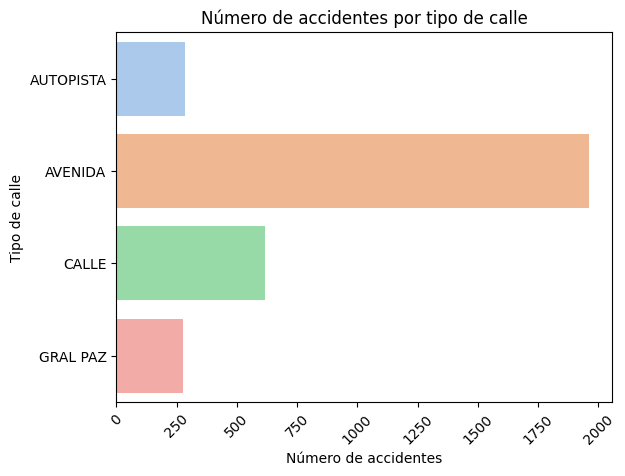

In [86]:
# Definir colores para las barras
colores = sns.color_palette("pastel")

# Crear el gráfico de barras
sns.countplot(data_hom["Tipo_calle"], palette=colores)

# Añadir título y etiquetas de los ejes
plt.title('Número de accidentes por tipo de calle')
plt.xlabel('Número de accidentes')
plt.ylabel('Tipo de calle')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


Implicación de un cruce en los accidentes de tránsito

C:\Users\User\AppData\Local\Temp\ipykernel_18208\724715754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cruces.values, y=top_cruces.index, palette='viridis')


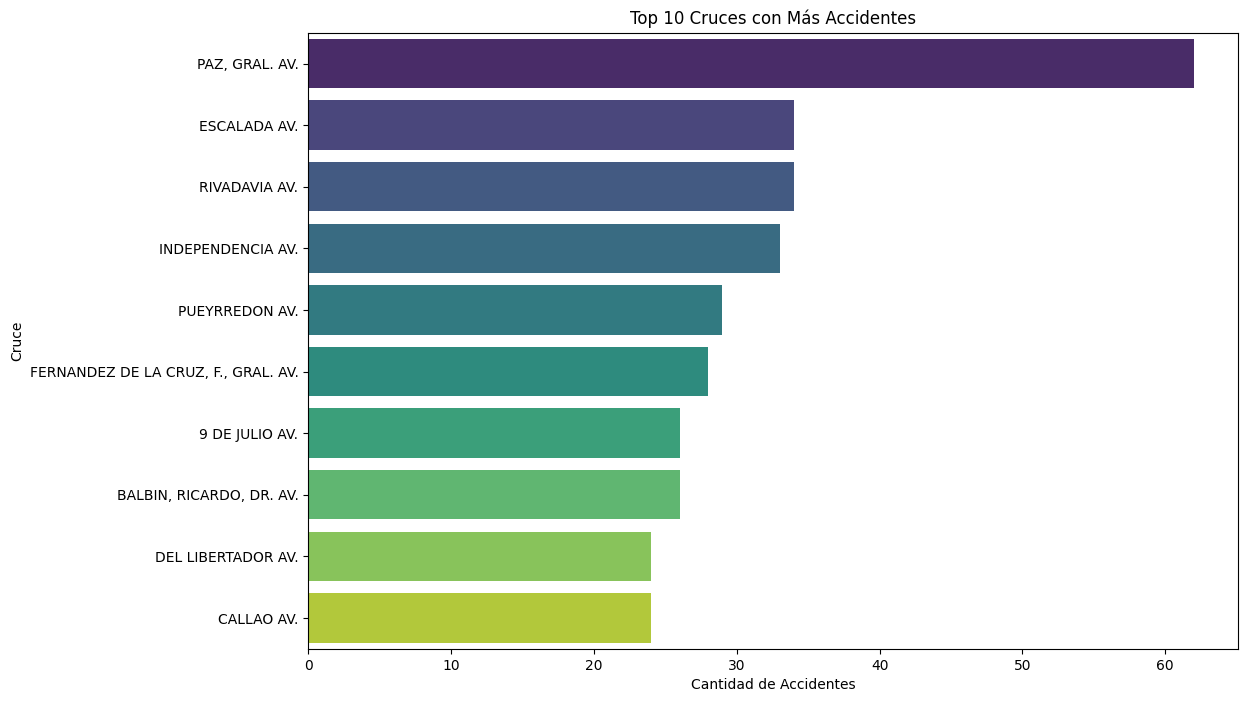

In [87]:
plt.figure(figsize=(12, 8))
top_cruces = data_hom['Cruce'].value_counts().head(11)  # Obtener los 10 cruces con más accidentes + el valor 'No'
top_cruces = top_cruces[top_cruces.index != 'No']  # Filtrar el valor 'No'
sns.barplot(x=top_cruces.values, y=top_cruces.index, palette='viridis')
plt.title('Top 10 Cruces con Más Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Cruce')
plt.show()


Tabla de contingencia donde se aprecia las víctimas segun su edad y sexo

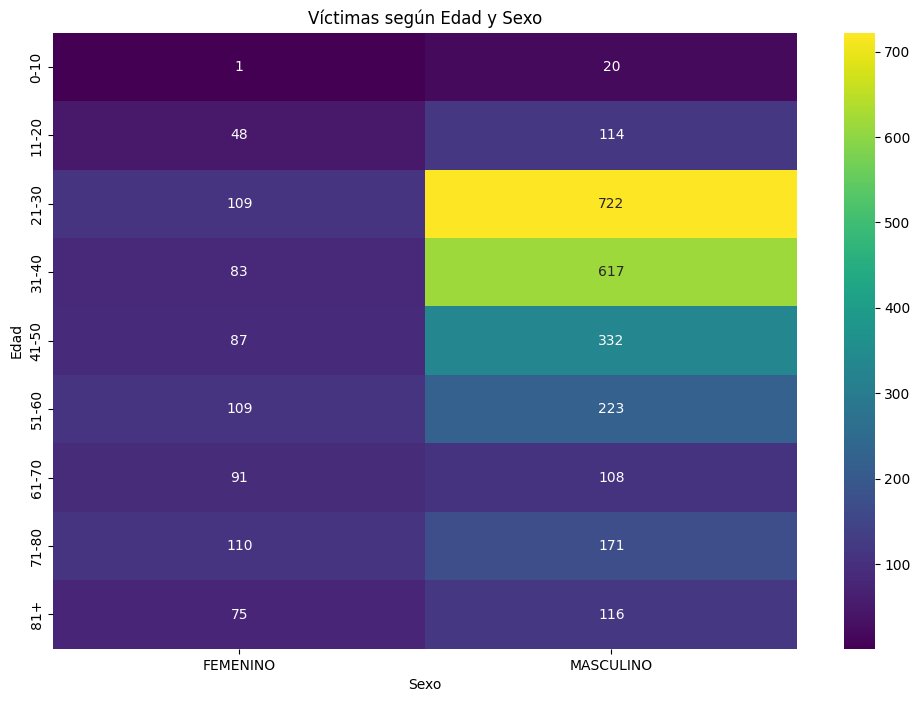

In [88]:
# Crear una tabla de contingencia usando pd.crosstab
tabla_contingencia = pd.crosstab(data_hom['Edad'], data_hom['Sexo'])

# Visualizar la tabla de contingencia como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingencia, cmap='viridis', annot=True, fmt='d')
plt.title('Víctimas según Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()


1er kpi Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes

In [89]:
def calcular_kpi(data):
    homicidios = data['Victimas'].sum()
    kpi = (homicidios / 3000000) * 100000
    return kpi

kpis_semestrales = []

# Iterar a través de cada semestre
for year in range(data_hom['Año'].min(), data_hom['Año'].max() + 1):
    for month in [1, 7]: 
        start_date = pd.Timestamp(year, month, 1)
        end_date = start_date + pd.DateOffset(months=6)
        semestre_df = data_hom[(data_hom['FECHA'] >= start_date) & (data_hom['FECHA'] < end_date)]
        kpi_semestre = calcular_kpi(semestre_df)
        
        # Obtener la cantidad de víctimas en el semestre actual
        total_victimas = semestre_df['Victimas'].sum()
        
        # Crear etiquetas de año y semestre
        etiqueta_semestre = f'Año {year}, Semestre {1 if month == 1 else 2}'
        
        # Agregar los datos a la lista de KPIs
        kpis_semestrales.append((start_date, etiqueta_semestre, total_victimas, kpi_semestre))

# Crear DataFrame
kpi_siniestros_viales = pd.DataFrame(kpis_semestrales, columns=['Fecha Inicio Semestre', 'Etiqueta', 'Total de Víctimas', 'KPI'])

kpi_siniestros_viales


,Fecha Inicio Semestre,Etiqueta,Total de Víctimas,KPI
0,2016-01-01,"Año 2016, Semestre 1",355,11.833333
1,2016-07-01,"Año 2016, Semestre 2",202,6.733333
2,2017-01-01,"Año 2017, Semestre 1",386,12.866667
3,2017-07-01,"Año 2017, Semestre 2",215,7.166667
4,2018-01-01,"Año 2018, Semestre 1",372,12.400000
5,2018-07-01,"Año 2018, Semestre 2",287,9.566667
6,2019-01-01,"Año 2019, Semestre 1",296,9.866667
7,2019-07-01,"Año 2019, Semestre 2",223,7.433333
8,2020-01-01,"Año 2020, Semestre 1",159,5.300000
9,2020-07-01,"Año 2020, Semestre 2",268,8.933333


Exportamos la data del kpi

In [90]:
# Guarda el DataFrame en el archivo CSV
kpi_siniestros_viales.to_csv('Datasets\kpi_siniestros_viales.csv',index=False)

2do kpi Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales

In [91]:
import pandas as pd

# Crear una lista para almacenar los resultados de cada año
resultados = []

# Iterar sobre los años desde 2016 hasta el año actual
año_actual = data_hom['Año'].max()
for año in range(2016, año_actual + 1):
    # Obtener el año anterior
    año_anterior = año - 1
    
    # Filtrar los accidentes mortales que involucran motociclistas para el año actual y el año anterior
    accidentes_actual = data_hom[(data_hom['Año'] == año) & (data_hom['Acusado'] == 'MOTO')]['Victimas'].sum()
    accidentes_anterior = data_hom[(data_hom['Año'] == año_anterior) & (data_hom['Acusado'] == 'MOTO')]['Victimas'].sum()
    
    # Calcular la reducción porcentual en la cantidad de accidentes mortales de motociclistas
    if accidentes_anterior != 0:
        kpi_motociclistas = ((abs(accidentes_anterior - accidentes_actual)) / accidentes_anterior) * 100
    else:
        kpi_motociclistas = 0  # Evitar división por cero si no hay datos del año anterior
        
    # Determinar el mensaje de evolución
    evolucion = "Creció" if accidentes_actual > accidentes_anterior else "Bajó" if accidentes_actual < accidentes_anterior else "Sin cambio"
    
    # Agregar los resultados a la lista
    resultados.append({'Año': año, 'Cantidad de Víctimas': accidentes_actual, 'KPI': kpi_motociclistas, 'Evolución': evolucion})

# Crear DataFrame a partir de la lista de resultados
kpi_motociclistas = pd.DataFrame(resultados)

# Mostrar el DataFrame
kpi_motociclistas


,Año,Cantidad de Víctimas,KPI,Evolución
0,2016,48,0.000000,Creció
1,2017,29,39.583333,Bajó
2,2018,58,100.000000,Creció
3,2019,39,32.758621,Bajó
4,2020,52,33.333333,Creció
5,2021,12,76.923077,Bajó


Exportamos la data extraida del kpi generado

In [92]:
# Guarda el DataFrame en el archivo CSV
kpi_motociclistas.to_csv('Datasets\kpi_motociclistas.csv',index=False)

3er kpi es generado para conocer la distribución de accidentes fatales según el tipo de calle

In [93]:
# Calcular el número de accidentes fatales por tipo de calle y sexo
accidentes_fatales_por_tipo_calle_y_sexo = data_hom[data_hom['Victima'] != 0].groupby(['Tipo_calle', 'Sexo']).size().reset_index(name='Accidentes_fatales')

# Calcular el total de accidentes fatales por tipo de calle
total_accidentes_fatales_por_tipo_calle = data_hom[data_hom['Victima'] != 0].groupby('Tipo_calle').size().reset_index(name='Total_accidentes_fatales')

# Fusionar los datos para calcular la proporción de accidentes fatales por tipo de calle y sexo
accidentes_fatales = pd.merge(accidentes_fatales_por_tipo_calle_y_sexo, total_accidentes_fatales_por_tipo_calle, on='Tipo_calle')

# Calcular la proporción de accidentes fatales por tipo de calle y sexo
accidentes_fatales['Proporcion_accidentes_fatales'] = (accidentes_fatales['Accidentes_fatales'] / accidentes_fatales['Total_accidentes_fatales']) * 100

# Mostrar el DataFrame resultante
accidentes_fatales


C:\Users\User\AppData\Local\Temp\ipykernel_18208\1702633793.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidentes_fatales_por_tipo_calle_y_sexo = data_hom[data_hom['Victima'] != 0].groupby(['Tipo_calle', 'Sexo']).size().reset_index(name='Accidentes_fatales')
C:\Users\User\AppData\Local\Temp\ipykernel_18208\1702633793.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_accidentes_fatales_por_tipo_calle = data_hom[data_hom['Victima'] != 0].groupby('Tipo_calle').size().reset_index(name='Total_accidentes_fatales')


,Tipo_calle,Sexo,Accidentes_fatales,Total_accidentes_fatales,Proporcion_accidentes_fatales
0,AUTOPISTA,FEMENINO,62,285,21.754386
1,AUTOPISTA,MASCULINO,223,285,78.245614
2,AVENIDA,FEMENINO,439,1960,22.397959
3,AVENIDA,MASCULINO,1521,1960,77.602041
4,CALLE,FEMENINO,160,616,25.974026
5,CALLE,MASCULINO,456,616,74.025974
6,GRAL PAZ,FEMENINO,52,275,18.909091
7,GRAL PAZ,MASCULINO,223,275,81.090909


Exportamos la data extraida del kpi 

In [94]:
# Guarda el DataFrame en el archivo CSV
accidentes_fatales.to_csv('Datasets\kpi_accidentes_fatales.csv',index=False)